In [295]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import copy
from sklearn.cluster import KMeans

cities = []
sol = []



In [296]:
def distance(x, y):
    dist = np.linalg.norm(np.array(x)-np.array(y))
    return dist


In [297]:
with open ('example_solution.csv', mode='r', newline='') as solution:

    reader = csv.reader(solution)
    for row in reader:
        sol.append(int(row[0]))

    idx = sol.index(0)

    front = sol[idx:]
    back = sol[0:idx]

    sol = front + back

    sol.append(int(0))

with open('TSP.csv', mode='r', newline='') as tsp:
    reader = csv.reader(tsp)
    for row in reader:
        cities.append(row)
        #cities.append([float(item) for item in row])
        



In [298]:


total_cost = 0

for idx in range(len(sol)-1):

    pos_city_1 = [float(cities[sol[idx]][0]), float(cities[sol[idx]][1])]
    pos_city_2 = [float(cities[sol[idx+1]][0]), float(cities[sol[idx+1]][1])]

    dist = distance(pos_city_1, pos_city_2)

    total_cost += dist

print('final cost: '+ str(total_cost))

final cost: 51314.71550400719


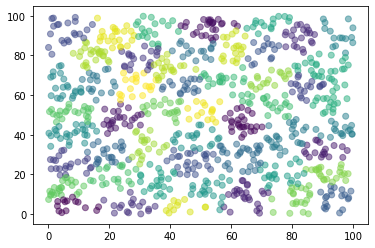

In [299]:
model = KMeans(n_clusters = 50)
model.fit(df)

predict = pd.DataFrame(model.predict(df))
predict.columns=['predict']

r = pd.concat([df,predict],axis=1)

 
plt.scatter(r['X'],r['Y'],c=r['predict'],alpha=0.5)


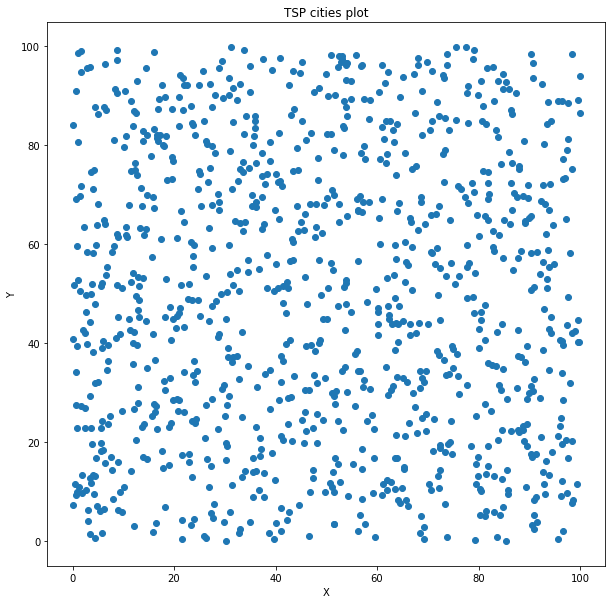

In [300]:

plt.figure(figsize=(10,10))
plt.scatter(df['X'], df['Y'])
'''
for idx in range(len(sol)-1):
    plt.plot([float(cities[sol[idx]][0]), float(cities[sol[idx+1]][0])], \
            [float(cities[sol[idx]][1]), float(cities[sol[idx+1]][1])], color="blue")
'''
plt.xlabel('X')
plt.ylabel('Y')
plt.title('TSP cities plot')
plt.show()

In [301]:
#모든 경로 구함
def getAllDis(path):
    totalcost = 0
    
    for idx in range(len(path)-1):
        pos_city_1 = [float(cities[path[idx]][0]), float(cities[path[idx]][1])]
        pos_city_2 = [float(cities[path[idx+1]][0]), float(cities[path[idx+1]][1])]

        dist = distance(pos_city_1, pos_city_2)

        totalcost += dist
    return totalcost
    

In [302]:
ch_num = 100

chrom = []
chrom_dis = []

allPath = list(range(1000))
print("initialize...")
usepath = []
for i in range(ch_num):
    #path = allPath.copy()
    #np.random.shuffle(path)
    path = []
    startpoint = int(np.random.random() * len(cities))
    while startpoint in usepath: startpoint = int(np.random.random() * len(cities))
    #print("Test1")
    usepath.append(startpoint)
    path.append(startpoint)
    for n in (range(len(cities)-1)):
        minlen = 10000
        minn = -1
        for j in range(len(cities)):
            if j in path: continue
            pos_city_1 = [float(cities[j][0]), float(cities[j][1])]
            pos_city_2 = [float(cities[path[-1]][0]), float(cities[path[-1]][1])]

            dist = distance(pos_city_1, pos_city_2)
            if minlen > dist:
                minlen = dist
                minn = j
        path.append(minn)
        
        
    
    #print(path)
        
    chrom.append(path)
    chrom_dis.append(getAllDis(path))
    print("init" + str(i))
    

initialize...
Test1
init0
Test1
init1
Test1
init2
Test1
init3
Test1
init4
Test1
init5
Test1
init6
Test1
init7
Test1
init8
Test1
init9
Test1
init10
Test1
init11
Test1
init12
Test1
init13
Test1
init14
Test1
init15
Test1
init16
Test1
init17
Test1
init18
Test1
init19
Test1
init20
Test1
init21
Test1
init22
Test1
init23
Test1
init24
Test1
init25
Test1
init26
Test1
init27
Test1
init28
Test1
init29
Test1
init30
Test1
init31
Test1
init32
Test1
init33
Test1
init34
Test1
init35
Test1
init36
Test1
init37
Test1
init38
Test1
init39
Test1
init40
Test1
init41
Test1
init42
Test1
init43
Test1
init44
Test1
init45
Test1
init46
Test1
init47
Test1
init48
Test1
init49
Test1
init50
Test1
init51
Test1
init52
Test1
init53
Test1
init54
Test1
init55
Test1
init56
Test1
init57
Test1
init58
Test1
init59
Test1
init60
Test1
init61
Test1
init62
Test1
init63
Test1
init64
Test1
init65
Test1
init66
Test1
init67
Test1
init68
Test1
init69
Test1
init70
Test1
init71
Test1
init72
Test1
init73
Test1
init74
Test1
init75
Test1
in

In [251]:
ch_num = 100

chrom = []
chrom_dis = []

print("initialize...")
for i in range(ch_num):
    path = allPath.copy()
    np.random.shuffle(path)
        
    chrom.append(path)
    chrom_dis.append(getAllDis(path))
    #print("init" + str(i))
    

initialize...


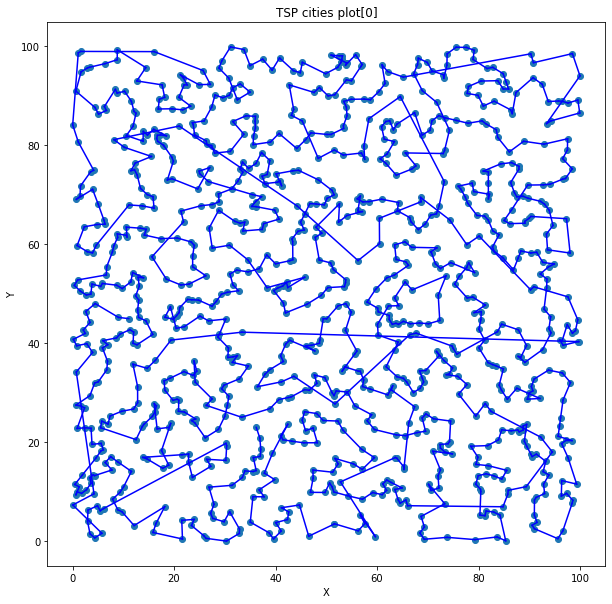

In [184]:

plt.figure(figsize=(10,10))
plt.scatter(df['X'], df['Y'])
for idx in range(len(chrom[0])-1):
    plt.plot([float(cities[chrom[0][idx]][0]), float(cities[chrom[0][idx+1]][0])], \
            [float(cities[chrom[0][idx]][1]), float(cities[chrom[0][idx+1]][1])], color="blue")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('TSP cities plot[0]')
plt.show()

In [ ]:
def divideArea():
    

In [ ]:


#순위 선택
def ranksel(ch):
    ch = sorted(ch, key=getAllDis)
    return ch


In [ ]:
#룰렛휠 선택
def roulettesel(chdis, k = 4):
    maxcost = max(chdis)
    mincost = min(chdis)
    costsum = sum((maxcost - i) + ((maxcost - mincost) / (k-1)) for i in chdis)
    selected = []
    
    for i in range(2):
        sel = np.random.uniform(0, costsum)
        adder = 0
        for i in range(len(chdis)):
            adder += (maxcost - chdis[i]) + ((maxcost - mincost) / (k-1))
            if(adder >= sel):
                #selected.append(i)
                selected.append(i)
                break
                
    return selected
            

In [ ]:
#토너먼트 선택
def getTSel(chdis, arr,k, t_rate):
    if k == 0:
        return arr[0];
    newarr = []
    i = 0
    while i < len(arr):
        if chdis[arr[i]] > chdis[arr[i+1]]:
            arr[i], arr[i+1] = arr[i+1], arr[i]
        if np.random.uniform() > t_rate:
            newarr.append(arr[i])
        else:
            newarr.append(arr[i+1])
        i += 2
    return getTSel(chdis, newarr, k-1, t_rate)
        
    

def tournamentSel(chdis, k,t_rate):
    arr = [int(np.random.random() * len(chdis)) for i in range(2 ** k)]
    
    
    return getTSel(chdis, arr, k, t_rate)
        
        
        
    
    


In [227]:
def simpletournamentSel(chdis, k):
    arr = [int(np.random.random() * len(chdis)) for i in range(k)]
    result = int(np.random.random() * len(chdis))
    for i in range(k-1):
        r = int(np.random.random() * len(chdis))
        if chdis[result] > chdis[r]: result = r
    
    
    return result

In [ ]:
def crossover(s1, s2):
    child1 = []
    
    startPoint = int(np.random.random() * len(s1))
    endPoint = int(np.random.random() * len(s1))
    
    if(startPoint > endPoint): startPoint, endPoint = endPoint, startPoint
    
    for i in range(startPoint, endPoint):
        child1.append(s2[i])
    
    news1 = []
    for i in s1:
        if i not in child1:
            news1.append(i)
            
    child = []
    child.extend(news1[:startPoint])
    child.extend(child1)
    child.extend(news1[startPoint:])
    
    #print(str(len(child1)) + " and " + str(len(news1)))
    #print(len(child))
    #print(child)
    
    return child
    

In [ ]:
def order_crossover(s1, s2):
    child1 = []
    
    startPoint = int(np.random.random() * len(s1))
    endPoint = int(np.random.random() * len(s1))
    
    if(startPoint > endPoint): startPoint, endPoint = endPoint, startPoint
    
    for i in range(startPoint, endPoint):
        child1.append(s2[i])
    
    news1 = []
    for i in s1:
        if i not in child1:
            news1.append(i)
            
    
    child1.extend(news1[:len(s1)-endPoint])
    
    child = []
    child.extend(news1[len(s1)-endPoint:])
    child.extend(child1)
    
    #print(str(len(child1)) + " and " + str(len(news1)))
    #print(len(child))
    
    return child
    
    

In [ ]:
def pmx_crossover(s1, s2):
    child1 = []
    
    startPoint = int(np.random.random() * len(s1))
    endPoint = int(np.random.random() * len(s1))
    
    if(startPoint > endPoint): startPoint, endPoint = endPoint, startPoint
    
    for i in range(startPoint, endPoint):
        child1.append(s2[i])

            
    
    
    child = [-1 for i in range(len(s1))]
    child[startPoint:endPoint] = child1
    
    for i in range(startPoint):
        if s1[i] not in child:
            child[i] = s1[i]
    for i in range(endPoint, len(s1)):
        if s1[i] not in child:
            child[i] = s1[i]
        
    news1 = []
    for i in s1:
        if i not in child:
            news1.append(i)
            
    cnt = 0
    for i in range(len(child)):
        if child[i] == -1:
            child[i] = news1[cnt]
            cnt+=1
    
    #print(str(len(child1)) + " and " + str(len(news1)))
    #print(len(child))
    
    return child
    
    

In [ ]:
def edge_crossover(s1, s2):
    edgelist = [[] for i in range(len(s1))]
    
    edgelist[s1[0]].append(s1[1])
    edgelist[s1[-1]].append(s1[-2])
    edgelist[s2[0]].append(s2[1])
    edgelist[s2[-1]].append(s2[-2])
    for i in range(1, len(s1)-1):
        if s1[i-1] not in edgelist[s1[i]]: edgelist[s1[i]].append(s1[i-1])
        if s1[i+1] not in edgelist[s1[i]]: edgelist[s1[i]].append(s1[i+1])
            
        if s2[i-1] not in edgelist[s2[i]]: edgelist[s2[i]].append(s2[i-1])
        if s2[i+1] not in edgelist[s2[i]]: edgelist[s2[i]].append(s2[i+1])
            
    child = []
    child.append(s1[0])
    for i in range(len(s1)-1):
        min = i+1
        for j in edgelist[child[i]]:
            if len(edgelist[min]) >= len(edgelist[j]) and j not in child:
                min = j
        if min in child:
            while min in child: 
                pass
        child.append(j)
        
    

In [ ]:
def mutation(ch, m_rate = 0.05):
    for i in range(len(ch)):
        if np.random.random() < m_rate:
            j = int(np.random.random() * len(ch))
            ch[i], ch[j] = ch[j], ch[i]
    
    
    return ch

In [303]:
gencnt = 100
m_rate = 0.0005

generate = []
gennote = []

def GA(chrom, chrom_dis):
    plt.figure(figsize=(10,10))
    for tri in range(gencnt):
        chrom = ranksel(chrom)
        chrom_dis = [getAllDis(chrom[i]) for i in range(len(chrom))]
        
        nextg = []
        nextdis = []
        
        #엘리트주의
        elitism = 5
        
        for i in range(elitism):
            nextg.append(chrom[i])
            nextdis.append(chrom_dis[i])
        
        for i in range(elitism, len(chrom)):
            #selected = roulettesel(chrom_dis, 5)z
            #selected = [tournamentSel(chrom_dis, 5, 0.8), tournamentSel(chrom_dis, 5, 0.9)]
            selected = [simpletournamentSel(chrom_dis, 20), simpletournamentSel(chrom_dis, 20)]
        
            #child = crossover(chrom[selected[0]], chrom[selected[1]])
            #child = order_crossover(chrom[selected[0]], chrom[selected[1]])
            child = pmx_crossover(chrom[selected[0]], chrom[selected[1]])
        
            child = mutation(child, m_rate)
            
            nextg.append(child)
            nextdis.append(getAllDis(child))
            
        
        generate.append(getAllDis(chrom[0]))
        gennote.append(chrom[0])
        #print(chrom)
        plt.plot(generate)
        #plt.show()
        
        print("Gen " + str(tri) + ": " + str(chrom_dis[0]))
        #print(chrom_dis)
        
        
        chrom = nextg
        chrom_dis = nextdis
        
        
    plt.show()

Gen 0: 2735.336472618628
Gen 1: 2735.336472618628
Gen 2: 2735.336472618628
Gen 3: 2735.336472618628
Gen 4: 2734.773573957423
Gen 5: 2734.773573957423
Gen 6: 2734.773573957423
Gen 7: 2734.773573957423
Gen 8: 2734.773573957423
Gen 9: 2734.773573957423
Gen 10: 2734.773573957423
Gen 11: 2734.773573957423
Gen 12: 2734.773573957423
Gen 13: 2734.773573957423
Gen 14: 2734.773573957423
Gen 15: 2734.773573957423
Gen 16: 2734.773573957423
Gen 17: 2734.773573957423
Gen 18: 2734.773573957423
Gen 19: 2734.773573957423
Gen 20: 2734.773573957423
Gen 21: 2734.773573957423
Gen 22: 2734.124131712744
Gen 23: 2734.124131712744
Gen 24: 2734.124131712744
Gen 25: 2734.124131712744
Gen 26: 2734.124131712744
Gen 27: 2734.124131712744
Gen 28: 2734.124131712744
Gen 29: 2734.124131712744
Gen 30: 2734.124131712744
Gen 31: 2734.124131712744
Gen 32: 2734.124131712744
Gen 33: 2734.124131712744
Gen 34: 2734.124131712744
Gen 35: 2734.124131712744
Gen 36: 2734.124131712744
Gen 37: 2734.124131712744
Gen 38: 2734.124131712

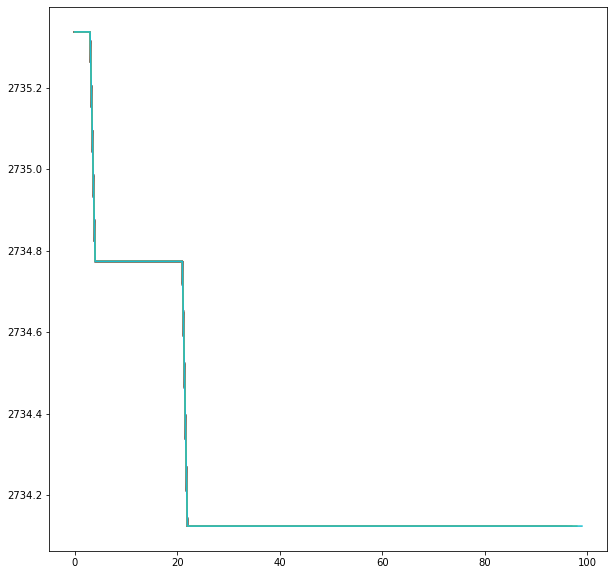

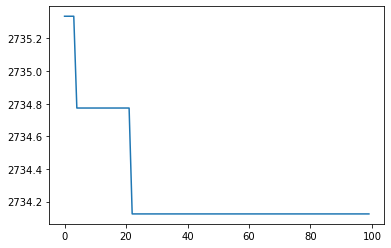

[533, 315, 270, 755, 933, 493, 721, 353, 359, 140, 769, 212, 639, 584, 743, 111, 873, 937, 902, 802, 172, 698, 470, 761, 428, 425, 268, 830, 313, 770, 38, 450, 631, 1, 379, 801, 934, 40, 661, 814, 504, 895, 77, 86, 559, 845, 126, 471, 229, 608, 334, 838, 971, 351, 338, 84, 452, 466, 148, 595, 894, 853, 451, 556, 570, 615, 69, 982, 560, 304, 307, 629, 197, 622, 461, 409, 738, 919, 543, 831, 899, 297, 316, 588, 815, 251, 896, 889, 731, 503, 380, 601, 691, 799, 748, 655, 565, 391, 549, 963, 206, 537, 850, 854, 481, 794, 762, 152, 915, 959, 654, 552, 372, 254, 386, 149, 758, 852, 462, 930, 944, 702, 193, 628, 389, 280, 105, 614, 26, 264, 383, 371, 187, 906, 477, 430, 85, 134, 877, 291, 130, 600, 740, 368, 278, 94, 416, 192, 780, 393, 712, 546, 541, 65, 744, 863, 669, 122, 51, 662, 164, 967, 55, 328, 123, 912, 582, 255, 310, 686, 309, 500, 387, 976, 429, 208, 955, 3, 79, 308, 324, 609, 226, 115, 953, 983, 213, 779, 792, 373, 978, 775, 810, 882, 22, 107, 531, 586, 707, 418, 851, 417, 103, 62

In [304]:
GA(chrom, chrom_dis)

plt.plot(generate)
plt.show()
print(gennote[-1])

In [24]:
def main():
    divArea(cities, area, 10)
    
main()

[[111, 148, 172, 425, 428, 451, 452, 466, 470, 556, 595, 698, 743, 761, 853, 873, 894], [84, 338, 351, 971], [126, 229, 334, 471, 504, 608, 661, 814, 838, 895], [12, 77, 86, 276, 365, 559, 618, 749, 845], [29, 74, 375, 460, 491, 670, 703, 778, 841], [62, 80, 274, 298, 333, 413, 534, 548, 633, 693], [93, 117, 165, 214, 578, 688, 842, 872, 991], [75, 725, 903], [18, 249, 295, 403, 505, 519, 683, 787, 788], [109, 136, 243, 317, 400, 405, 407, 514, 640, 806, 839, 883, 935], [140, 212, 270, 315, 353, 359, 493, 533, 584, 639, 721, 755, 769, 802, 902, 933, 937], [38, 268, 313, 450, 631, 770, 830], [1, 40, 266, 379, 501, 801, 934], [9, 91, 104, 135, 241, 336, 346, 420, 422, 526, 692, 713, 817, 881, 939], [290, 494, 647, 656], [118, 437, 474, 550, 727, 735, 798, 958, 975, 987], [53, 151, 177, 443, 478, 745, 785, 847, 892, 960], [204, 341, 369, 384, 512, 555, 603, 650, 676, 687, 776, 926, 964, 969, 970, 996], [198, 215, 288, 305, 498, 530, 557, 728, 766, 880, 985], [89, 299, 366, 412, 424, 472, 

start 0 sector
0세대, 거리: 49900.88135996094
1세대, 거리: 49474.66942144866
2세대, 거리: 49057.767310467636
3세대, 거리: 49057.767310467636


KeyboardInterrupt: 

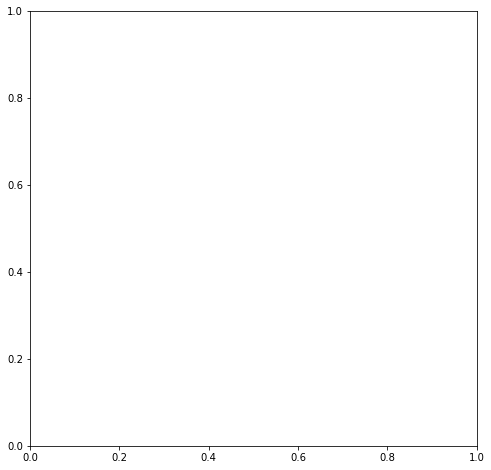